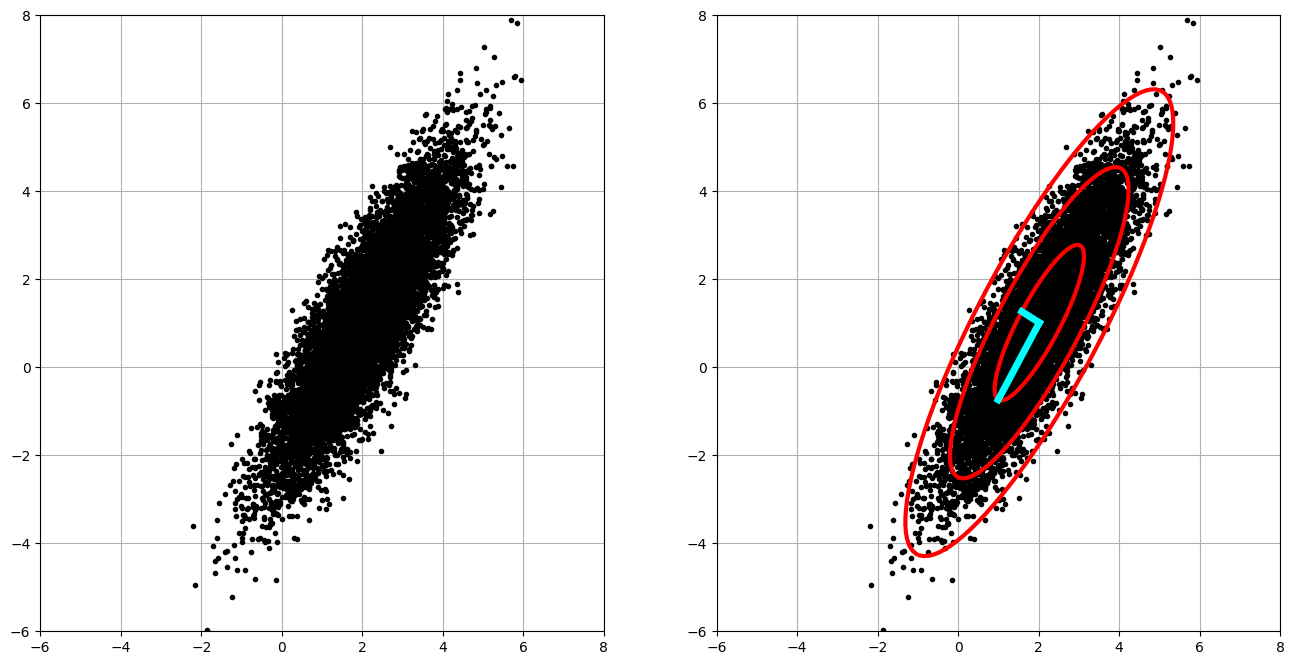

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (16.0, 8.0) # set default size of plots

xC = np.array([2,1]) # center of data (mean)
sig = np.array([2, 0.5]) # principal axes

theta = np.pi/3 # rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)], 
    [np.sin(theta), np.cos(theta)]]) # rotation matrix

# Generate 10,000 points from a Gaussian distribution
xPoints = 10000
X = R @ np.diag(sig) @ np.random.randn(2, xPoints) + np.diag(xC) @ np.ones((2, xPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:], X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


# PCA
Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(xPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(xPoints),full_matrices=0)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()


In [ ]:
# Reimplementation
import matplotlib.pyplot as plt